In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

import math

In [ ]:
import seaborn as sns
from prettytable import PrettyTable

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install p7zip
!apt-get install p7zip-full 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-6).
p7zip set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!7za e '/content/drive/MyDrive/Học máy/mercari-price-suggestion-challenge/test.tsv.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Học ma . ri-price-suggestion-challenge/                                                                          1 file, 35617013 bytes (34 MiB)

Extracting archive: /content/drive/MyDrive/Học máy/mercari-price-suggestion-challenge/test.tsv.7z
--
Path = /content/drive/MyDrive/Học máy/mercari-price-suggestion-challenge/test.tsv.7z
Type = 7z
Physical Size = 35617013
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      8% - test.tsv                16% - test.tsv                24% - test.tsv

In [ ]:
!7za e '/content/drive/MyDrive/Học máy/mercari-price-suggestion-challenge/train.tsv.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Học ma . ri-price-suggestion-challenge/                                                                          1 file, 77912192 bytes (75 MiB)

Extracting archive: /content/drive/MyDrive/Học máy/mercari-price-suggestion-challenge/train.tsv.7z
--
Path = /content/drive/MyDrive/Học máy/mercari-price-suggestion-challenge/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      3% - train.tsv                  4% - train.tsv                  6% - 

In [ ]:
print("Loading data...")
train = pd.read_table("./train.tsv")
test = pd.read_table("./test.tsv")
print(train.shape)
print(test.shape)

Loading data...
(1482535, 8)
(693359, 7)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
train_id,1.48254e+06,NaN,NaN,NaN,741267,427971,0,370634,741267,1.1119e+06,1.48253e+06
name,1482535,1225273,Bundle,2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_condition_id,1.48254e+06,NaN,NaN,NaN,1.90738,0.903159,1,1,2,3,5
category_name,1476208,1287,"Women/Athletic Apparel/Pants, Tights, Leggings",60177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand_name,849853,4809,PINK,54088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1.48254e+06,NaN,NaN,NaN,26.7375,38.5861,0,10,17,29,2009
shipping,1.48254e+06,NaN,NaN,NaN,0.447274,0.497212,0,0,0,1,1
item_description,1482531,1281426,No description yet,82489,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

# Preprocessing

**Phân tích phần Danh mục**

Như ta thấy trong tập dữ liệu train, giá trị của trường **category_name** bao gồm các danh mục nhỏ hơn, các danh mục được ngăn cách với nhau bởi dấu **/**. Ở đây, ta sẽ tách **category_name** thành các dânh mục nhỏ hơn


In [ ]:
def handle_category(data):
  """this function splits the category_name into further three sub_categories."""
  cat1=[]
  cat2=[]
  cat3=[]
  i=0
  for row in data:
    try:
      categories=row.split('/')
    except:
      categories=['','','']
    cat1.append(categories[0])
    cat2.append(categories[1])
    cat3.append(categories[2])
    i+1
  return cat1,cat2,cat3

In [ ]:
c1,c2,c3=handle_category(train['category_name'])
train['sub_category1']=c1
train['sub_category2']=c2
train['sub_category3']=c3

**Process Missing Values**

In [ ]:
print("Processing categorical variables...")
def handle_missing(dataset):
    dataset.category_name.fillna(value="missing", inplace=True)
    dataset.brand_name.fillna(value="missing", inplace=True)
    dataset.item_description.fillna(value="missing", inplace=True)
    return (dataset)

train = handle_missing(train)
test = handle_missing(test)
print(train.shape)
print(test.shape)

Processing categorical variables...
(1482535, 11)
(693359, 7)


In [ ]:
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_category1,sub_category2,sub_category3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse


In [ ]:
# del train

# Explore Data Analysis

## Phân tích từng trường

### sub_category1

Number of Unique Category1: 11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


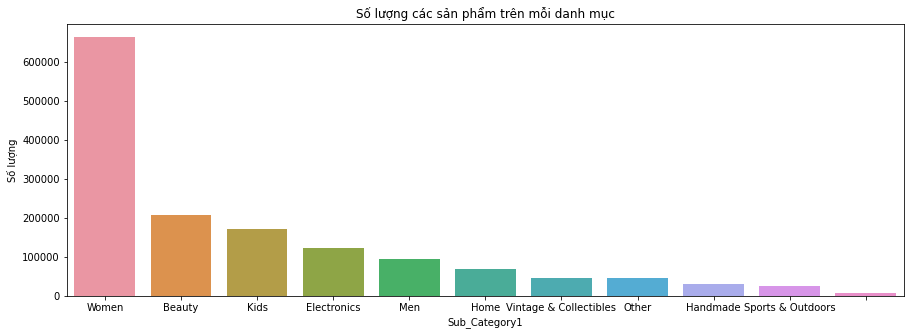

In [ ]:
count=train['sub_category1'].value_counts()
print("Number of Unique Category1: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index,count)
plt.title("Số lượng các sản phẩm trên mỗi danh mục")
plt.xlabel('Sub_Category1')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét**

    * 3 danh mục chính trong trường sub_category1 là Women, Beauty, Kids
    * Với số lượng hơn 600000 sản phẩm, danh mục Women có sự phổ biến cao nhất


### sub_category2

Number of Unique Category2: 114


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


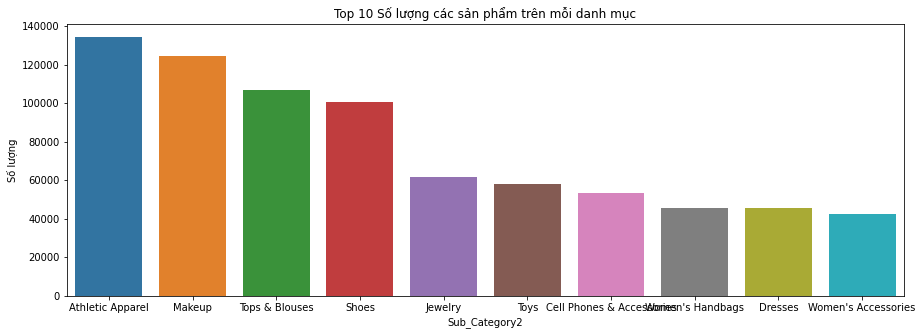

In [ ]:
count=train['sub_category2'].value_counts()
print("Number of Unique Category2: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.title("Top 10 Số lượng các sản phẩm trên mỗi danh mục")
plt.xlabel('Sub_Category2')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét**

    * 3 danh mục chính trong trường sub_category2 là Athletic Apparel, Makeup, Tops & Blouses
    * Với số lượng hơn 130000 sản phẩm, danh mục Athletic Apparel có sự phổ biến cao nhất


 ### sub_category3

Number of Unique Category3: 871


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


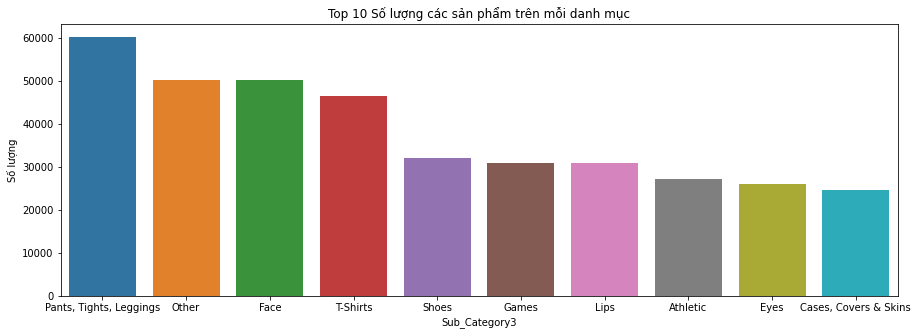

In [ ]:
count=train['sub_category3'].value_counts()
print("Number of Unique Category3: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.title("Top 10 Số lượng các sản phẩm trên mỗi danh mục")
plt.xlabel('Sub_Category3')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét**

    * 3 danh mục chính trong trường sub_category3 là Pants, Tights, Leggings; Other; Face
    * Với số lượng hơn 600000 sản phẩm, danh mục Pants, Tights, Leggings có sự phổ biến cao nhất trong trường sub_category3

**Nhận xét chung về trường category_name**

    * Ta có thể thấy trong tập dữ liệu train, các sản phẩm hướng tới phụ nữ chiếm tỷ trọng cao nhất


### brand_names

Number of Unique Brands: 4810


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


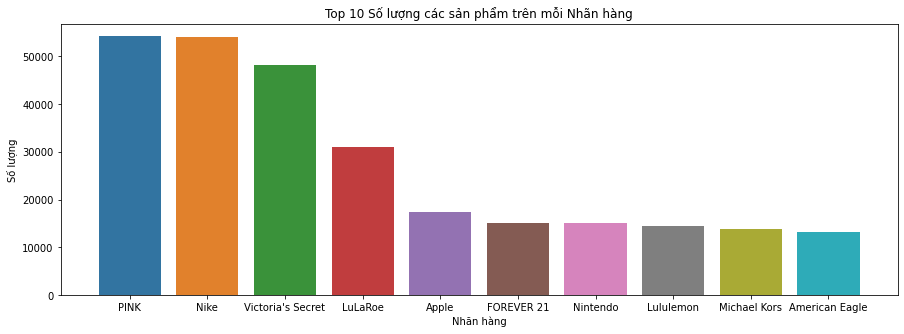

In [ ]:
unique_brands=train['brand_name'].value_counts()
print("Number of Unique Brands: {}".format(len(unique_brands)))
plt.figure(figsize=(15,5))
sns.barplot(unique_brands.index[1:11],unique_brands[1:11])
plt.title('Top 10 Số lượng các sản phẩm trên mỗi Nhãn hàng')
plt.xlabel('Nhãn hàng')
plt.ylabel('Số lượng')
plt.plot()
plt.show()

**Nhận xét:**


    *   Nike, PINK và Victoria's Secret là các nhãn hiệu phổ biến nhất trong tập dữ liệu huấn luyện.
    *   Trên thực tế, phần lớn sản phẩm không có nhãn hiệu, do vậy ta sẽ bỏ qua những sản phẩm không có nhãn.



### item_condition_id

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


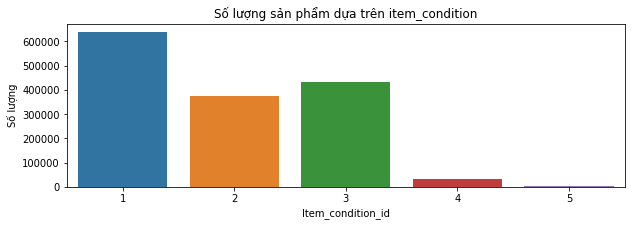

In [ ]:
count=train['item_condition_id'].value_counts()
plt.figure(figsize=(10,3))
sns.barplot(count.index[:10],count[:10])
plt.title('Số lượng sản phẩm dựa trên item_condition')
plt.xlabel('Item_condition_id')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:**


    *   Hơn 600000 sản phẩm có item_condition_id = 1. 
    *   Item_condition_id = 1 phổ biến nhất trong tập dữ liệu.



### Shipping:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


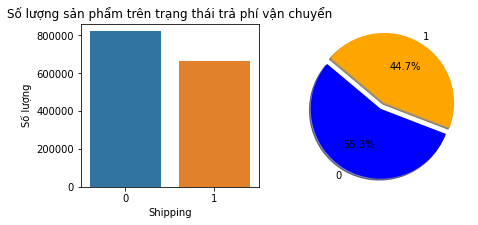

In [ ]:
count=train['shipping'].value_counts()
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.barplot(count.index,count)
plt.xlabel('Shipping')
plt.ylabel('Số lượng')
plt.title('Số lượng sản phẩm trên trạng thái trả phí vận chuyển')
plt.subplot(1,2,2)
labels = ['0','1']
sizes = count
colors = ['blue','orange']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Nhận xét:**


*   Phí vận chuyển được trả bởi người mua chiếm tỷ lệ cao hơn: 55.3%
*   Còn phí vận chuyển được trả bởi người bán chỉ chiếm 44.7%.



### Price:

In [ ]:
train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

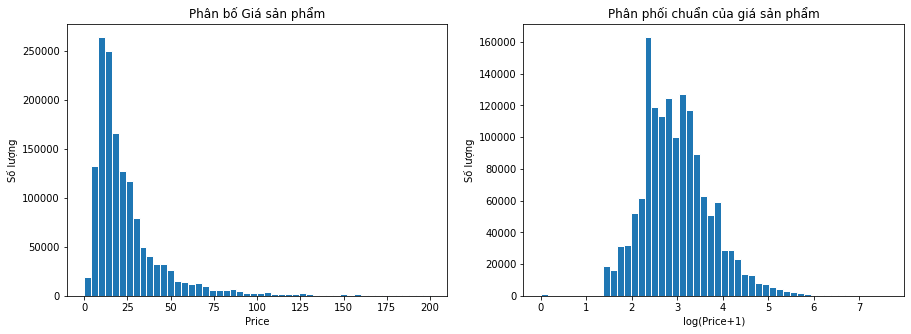

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(train['price'],bins=50,range=[0,200],edgecolor='white')
plt.title('Phân bố Giá sản phẩm')
plt.xlabel('Price')
plt.ylabel("Số lượng")
plt.subplot(1,2,2)
log_price=[np.log(i+1) for i in train['price']]
plt.hist(np.log(train['price']+1),bins=50,edgecolor='white')
plt.title("Phân phối chuẩn của giá sản phẩm")
plt.xlabel("log(Price+1)")
plt.ylabel("Số lượng")
plt.show()

**Nhận xét:**


    *   Ở biểu đồ bên trái, ta thấy có các sản phẩm có giá bằng 0.




### Name

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


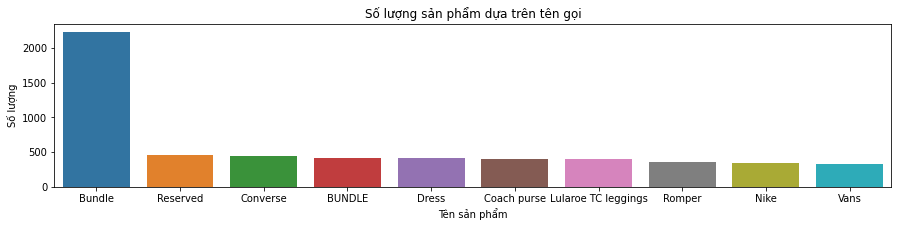

In [62]:
count=train['name'].value_counts()
plt.figure(figsize=(15,3))
sns.barplot(count.index[:10],count[:10])
plt.title('Số lượng sản phẩm dựa trên tên gọi')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:**


*   Bundle, Reserved và Converse là 3 tên sản phẩm phổ biến nhất trong tập dữ liệu.
*   Có hơn 2000 sản phẩm có tên chứa từ Bundle.



## Phân tích song biến (Bi-Variant)

### Phân tích mối quan hệ giữa trường Shipping và trường Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


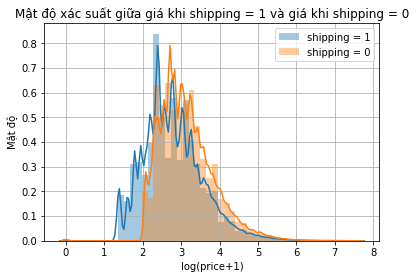

In [ ]:
one_shipping=np.log(train.loc[train['shipping']==1,'price']+1)
zero_shipping=np.log(train.loc[train['shipping']==0,'price']+1)
sns.distplot(one_shipping,label='shipping = 1')
sns.distplot(zero_shipping,label='shipping = 0')
plt.title('Mật độ xác suất giữa giá khi shipping = 1 và giá khi shipping = 0')
plt.xlabel("log(price+1)")
plt.ylabel("Mật độ")
plt.grid()
plt.legend()
plt.show()

**Nhận xét:**


    *   Có thể thấy mật độ của giá khi trạng thái shipping bằng 0 có đỉnh cao hơn so với trạng thái shipping bằng 1 hay giá của các sản phẩm với chi phí vận chuyển được trả bởi người mua cao hơn so với khi chi phí đó được trả bởi người bán.



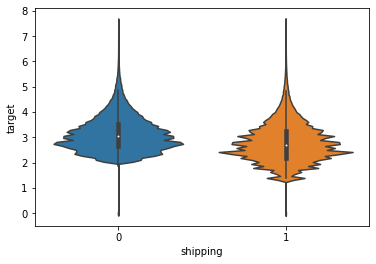

In [ ]:
train['target']=np.log(train['price']+1)
sns.violinplot(x="shipping", y="target", data=train)
plt.show()

**Nhận xét:**


    *   Giá trung bình của sản phẩm khi shipping = 0 cao hơn so với khi shipping = 1
    *   Nhìn đồ thị, ta thấy phần lớn khoảng giá của 2 trường hợp là như nhau.



### Phân tích mối quan hệ giữa trường Brand_name và trường Price


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


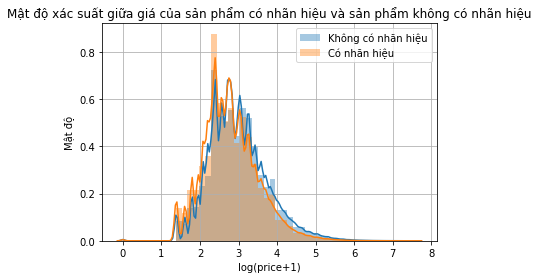

In [ ]:
unknown_brand=np.log(train.loc[train['brand_name']!='mising','price']+1)
brand=np.log(train.loc[train['brand_name']=='missing','price']+1)
sns.distplot(unknown_brand,label='Không có nhãn hiệu')
sns.distplot(brand,label='Có nhãn hiệu')
plt.title('Mật độ xác suất giữa giá của sản phẩm có nhãn hiệu và sản phẩm không có nhãn hiệu')
plt.xlabel('log(price+1)')
plt.ylabel('Mật độ')
plt.grid()
plt.legend()
plt.show()

**Nhận xét:**


    * Như trên đồ thị ta thấy giá của các sản phẩm có nhãn hiệu cao hơn so với các sản phẩm không có nhãn hiệu
    * Ngoài ra, 90% phần đồ thị của 2 trạng thái có phân bố trùng nhau


### Phân tích mối quan hệ giữa trường sub_category1 và Price

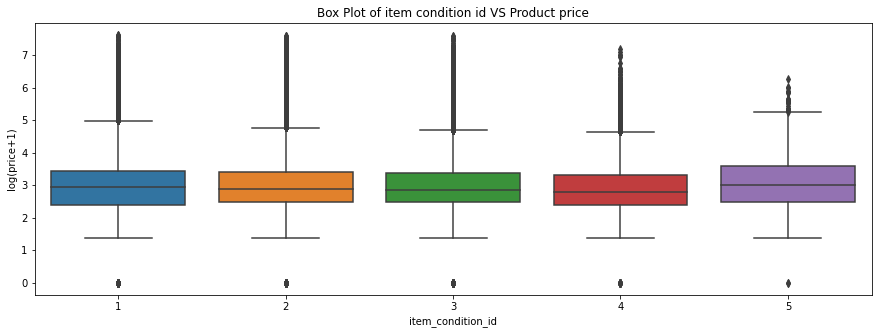

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train['item_condition_id'],y=np.log(train['price']+1))
plt.title('Box Plot of item condition id VS Product price')
plt.ylabel('log(price+1)')
plt.show()

**Nhận xét:**


    *   Giá trị trung bình của sản phẩm với item_condition_id = 5 cao hơn so với các danh mục khác.
    *   Phần lớn khoảng giá của các dang mục của item_condition đều có sự tương đồng với nhau.



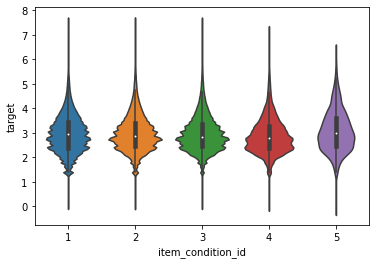

In [ ]:
sns.violinplot(x='item_condition_id',y='target',data=train)
plt.show()

**Nhận xét:**


    *   Theo đồ thị ở trên, ta khẳng định khoảng giá của các trường hợp khác tương đồng với nhau.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

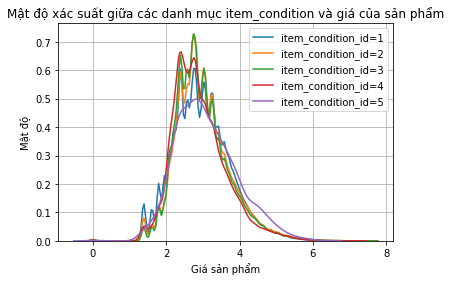

In [ ]:
id1=np.log(train.loc[train['item_condition_id']==1,'price']+1)
id2=np.log(train.loc[train['item_condition_id']==2,'price']+1)
id3=np.log(train.loc[train['item_condition_id']==3,'price']+1)
id4=np.log(train.loc[train['item_condition_id']==4,'price']+1)
id5=np.log(train.loc[train['item_condition_id']==5,'price']+1)
sns.distplot(id1,hist=False,label='item_condition_id=1')
sns.distplot(id2,hist=False,label='item_condition_id=2')
sns.distplot(id3,hist=False,label='item_condition_id=3')
sns.distplot(id4,hist=False,label='item_condition_id=4')
sns.distplot(id5,hist=False,label='item_condition_id=5')
plt.title('Mật độ xác suất giữa các danh mục item_condition và giá của sản phẩm')
plt.xlabel('Giá sản phẩm')
plt.ylabel('Mật độ')
plt.grid()
plt.legend()
plt.show()

**Nhận xét:**


      * Giá đỉnh của sản phẩm trong danh mục item_condition_id = 3 có giá trị cao nhất.
      * Mật độ của các danh mục cũng khá tương đồng nhau.



### Phân tích mối quan hệ giữa trường sub_category1 và Price

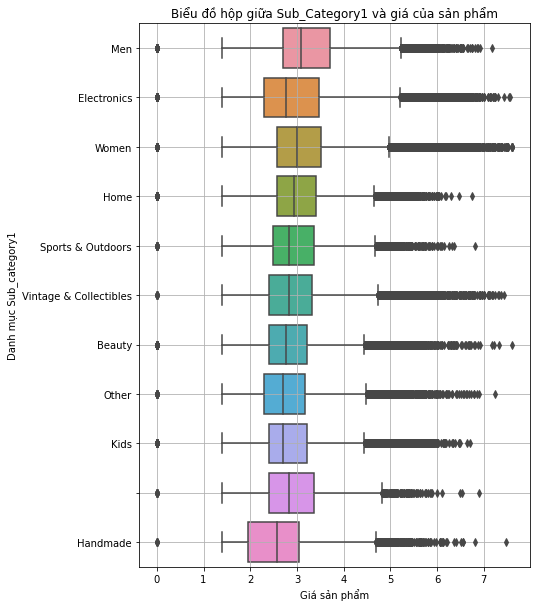

In [ ]:
plt.figure(figsize=(7,10))
sns.boxplot(y=train['sub_category1'],x=np.log(train['price']+1))
plt.title('Biểu đồ hộp giữa Sub_Category1 và giá của sản phẩm')
plt.ylabel('Danh mục Sub_category1')
plt.xlabel('Giá sản phẩm')
plt.grid()
plt.show()

**Nhận xét:**


    * Theo biều đồ hộp, sản phẩm thuộc danh mục Woman có giá cao nhất, tiếp theo là sản phẩm theo danh mục Electronics
    * Sản phẩm của danh mục Handmade có giá thấp nhất.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

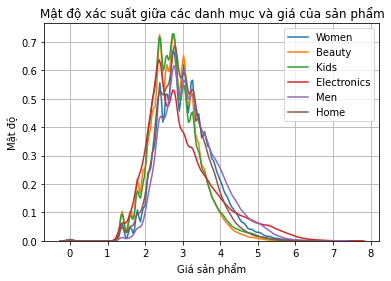

In [ ]:
id1=np.log(train.loc[train['sub_category1']=='Women','price']+1)
id2=np.log(train.loc[train['sub_category1']=='Beauty','price']+1)
id3=np.log(train.loc[train['sub_category1']=='Kids','price']+1)
id4=np.log(train.loc[train['sub_category1']=='Electronics','price']+1)
id5=np.log(train.loc[train['sub_category1']=='Men','price']+1)
id6=np.log(train.loc[train['sub_category1']=='Home','price']+1)
sns.distplot(id1,hist=False,label='Women')
sns.distplot(id2,hist=False,label='Beauty')
sns.distplot(id3,hist=False,label='Kids')
sns.distplot(id4,hist=False,label='Electronics')
sns.distplot(id5,hist=False,label='Men')
sns.distplot(id6,hist=False,label='Home')
plt.title('Mật độ xác suất giữa các danh mục và giá của sản phẩm')
plt.xlabel('Giá sản phẩm')
plt.ylabel('Mật độ')
plt.grid()
plt.legend()
plt.show()


**Nhận xét:**


    *  Mật độ của các danh mục khá tương đồng nhau.
    * Các danh mục như Kids và Beauty chứa sản phẩm có giá cao nhất



## Phân tích trường dạng văn bản

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import collections
from wordcloud import STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
stopwords=set(stopwords.words('english'))

In [ ]:
def decontracted(phrase):
    """this function removies shorthands for the textual data..."""
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

**Xoá StopWord**


- Bên trong trường item_description là 1 đoạn văn, gồm nhiều ký tự, do vậy sẽ có nhiều Stopword - các từ có tần suất xuất hiện nhiều trong đoạn văn nhưng không đóng góp nhiều vào nội dung của đoạn văn đó. Do vậy, ta sẽ cần loại bỏ những từ Stopword ra khỏi các giá trị trường item_description.
- Sau khi xoá các từ Stopword, ta sẽ thu được các điểm chính trong các đoạn giới thiệu sản phẩm



In [ ]:
def text_preprocessing(data):
  """this function performs preprocessing the item_description """
  preprocessed_total = []
  for sentance in tqdm(data['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)  #removing stop words
    preprocessed_total.append(sent.lower().strip())
  return preprocessed_total

In [ ]:
train['item_description']=text_preprocessing(train)

100%|██████████| 1482535/1482535 [00:59<00:00, 25091.82it/s]


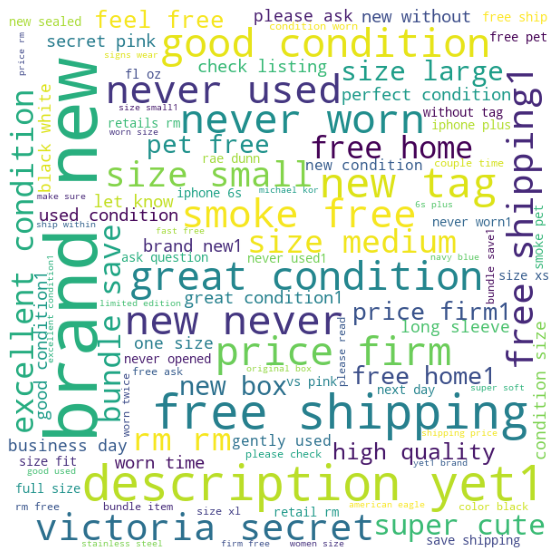

In [ ]:
stopwords=set(STOPWORDS)
word_cloud = WordCloud(width = 600, height = 600,background_color ='white', stopwords=stopwords,min_font_size = 10).generate("1 ".join(train['item_description']))
plt.figure(figsize = (15, 10))
plt.imshow(word_cloud)
plt.axis('off')                                             
plt.show()

**Nhận xét:**


      * Như ảnh ở trên, ta thấy các từ như brand, new, free, shipping, yet là các tử được sử dụng nhiều nhất trong trường item_description
      * Vì vậy, ta suy ra được những người bán dùng các từ brand, new, free, shipping, yet nhiều để quảng bà và giới thiệu sản phẩm cho người mua.


In [ ]:
word_count={}
for sentence in tqdm(train['item_description']):
    for word in sentence.split(' '):
        if len(word)>=3:  #taking words which are of length>=3
            if word not in word_count:
                word_count[word]=1  #if word not present in dict assigning it to 1
            else:
                word_count[word]+=1 #else incrementing it by 1

100%|██████████| 1482535/1482535 [00:16<00:00, 88622.66it/s]


In [ ]:
n_print=25
word_counter = collections.Counter(word_count)
words=[]
counter=[]
for word, count in word_counter.most_common(n_print):
    words.append(word)
    counter.append(count)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


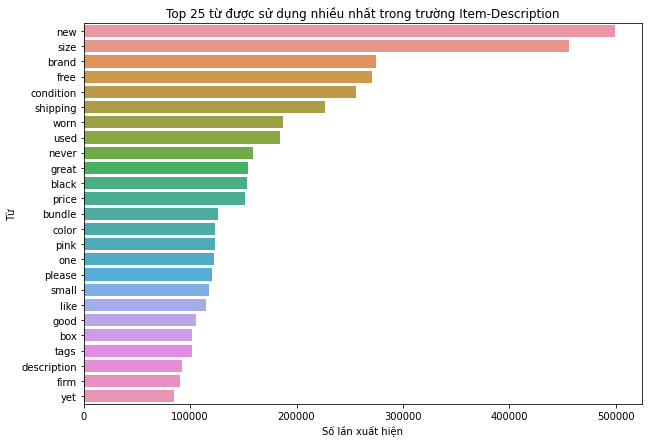

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(counter,words)
plt.title("Top 25 từ được sử dụng nhiều nhất trong trường Item-Description")
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Từ')
plt.show()

**Nhận xét:**


    *   Từ new và size là 2 từ được sử dụng nhiều nhất trong trường Item_description.
    *   45 sản phẩm sử dụng từ **new** trong trường item_description.

